<a href="https://colab.research.google.com/github/AymanNasser/Random-DNN-Notebooks/blob/master/Getting_Started_with_Pytorch_using_Resnet_101.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing libs

In [1]:
import numpy as np
import pandas as pd
import torch

In [2]:
print(torch.__version__)
torch.cuda.is_available()

1.6.0+cu101


False

## Exploring torch pretrained models  

In [3]:
from torchvision import models
dir(models)

['AlexNet',
 'DenseNet',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'Inception3',
 'InceptionOutputs',
 'MNASNet',
 'MobileNetV2',
 'ResNet',
 'ShuffleNetV2',
 'SqueezeNet',
 'VGG',
 '_GoogLeNetOutputs',
 '_InceptionOutputs',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_utils',
 'alexnet',
 'densenet',
 'densenet121',
 'densenet161',
 'densenet169',
 'densenet201',
 'detection',
 'googlenet',
 'inception',
 'inception_v3',
 'mnasnet',
 'mnasnet0_5',
 'mnasnet0_75',
 'mnasnet1_0',
 'mnasnet1_3',
 'mobilenet',
 'mobilenet_v2',
 'quantization',
 'resnet',
 'resnet101',
 'resnet152',
 'resnet18',
 'resnet34',
 'resnet50',
 'resnext101_32x8d',
 'resnext50_32x4d',
 'segmentation',
 'shufflenet_v2_x0_5',
 'shufflenet_v2_x1_0',
 'shufflenet_v2_x1_5',
 'shufflenet_v2_x2_0',
 'shufflenetv2',
 'squeezenet',
 'squeezenet1_0',
 'squeezenet1_1',
 'utils',
 'vgg',
 'vgg11',
 'vgg11_bn',
 'vgg13',
 'vgg13_bn',
 'vgg16',
 'vg

In [5]:
from torchsummary import summary
alex_net_model = models.AlexNet()
# summary(alex_net_model.cuda(), (3,64,64))

In [6]:
resnet_model = models.resnet101(pretrained=True) # Invoking the model to download resnet101 official weights
# resnet_model.cuda()
# summary(resnet_model.cuda(), input_size=(3,1080,720))

Downloading: "https://download.pytorch.org/models/resnet101-5d3b4d8f.pth" to /root/.cache/torch/hub/checkpoints/resnet101-5d3b4d8f.pth


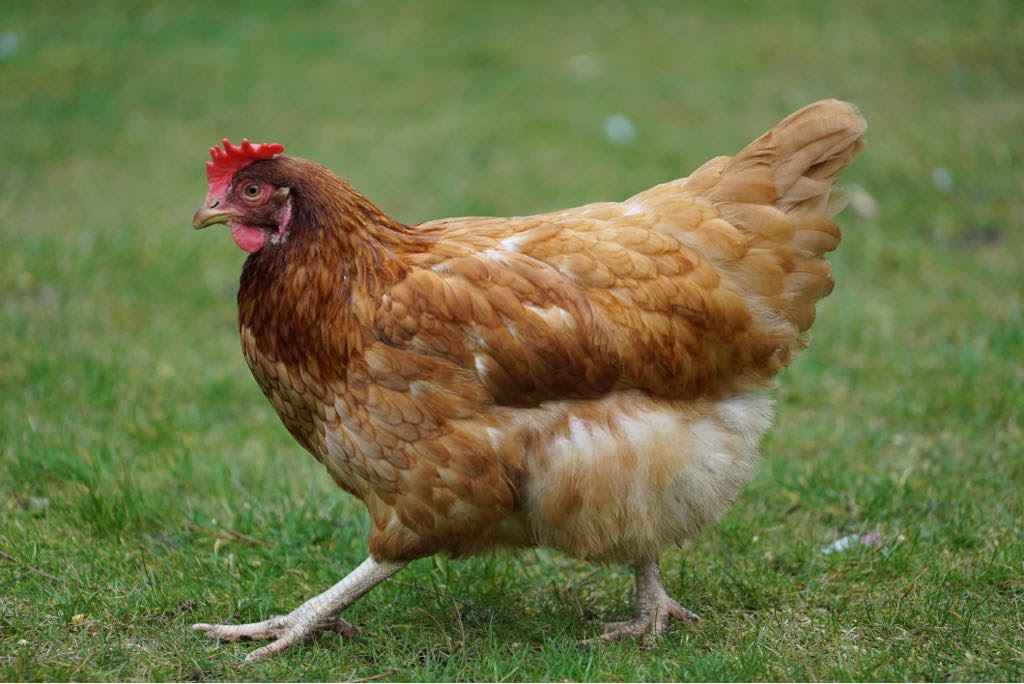

In [37]:
from PIL import Image
img = Image.open('/tmp/hen.jpg')
img

## Passing an image to a preprocessing pipeline

In [38]:
from torchvision import transforms

In [39]:
preprocess_pipeline = transforms.Compose([
                                          transforms.Resize(256), # reshaping the image to 256*256 px 
                                          transforms.CenterCrop(224), # centering & cropping image to 224*22 px
                                          transforms.ToTensor(),
                                          transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                               std=[0.229, 0.224, 0.225])  # normalizing each channel with mean & std
                                          ])

In [40]:
img_t = preprocess_pipeline(img=img)
img_t

tensor([[[-0.5424, -0.5253, -0.5082,  ..., -0.1143, -0.1314, -0.1486],
         [-0.4739, -0.4568, -0.4397,  ..., -0.1143, -0.1314, -0.1314],
         [-0.4226, -0.3883, -0.3541,  ..., -0.0629, -0.0458, -0.0458],
         ...,
         [ 0.2453,  0.3138,  0.6563,  ..., -0.3712, -0.2171, -0.2171],
         [-0.2513,  0.0912,  0.0227,  ..., -0.3712, -0.2342, -0.4568],
         [-0.6794, -0.3198, -0.9192,  ..., -0.4054, -0.6109, -0.7650]],

        [[ 0.2052,  0.2227,  0.2402,  ...,  0.2927,  0.2927,  0.2752],
         [ 0.2402,  0.2577,  0.2927,  ...,  0.2752,  0.2752,  0.2752],
         [ 0.2752,  0.3102,  0.3452,  ...,  0.2577,  0.2577,  0.2752],
         ...,
         [ 0.1176,  0.2577,  0.5553,  ...,  0.0126,  0.2052,  0.2227],
         [-0.0749,  0.4153,  0.0826,  ..., -0.0049,  0.1877, -0.0049],
         [-0.2850,  0.3277, -0.6001,  ..., -0.0924, -0.2675, -0.4251]],

        [[-0.4624, -0.4450, -0.4101,  ..., -0.4450, -0.4275, -0.4450],
         [-0.4450, -0.4101, -0.3753,  ..., -0

In [41]:
batch_t = torch.unsqueeze(img_t, 0)

## Running model

In [42]:
# In order to do inference, we need to put the network in eval mode
resnet_model.eval()


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [43]:
out = resnet_model(batch_t)

In [44]:
with open('../tmp/imagenet1000_clsidx_to_labels.txt', 'r') as file:
  labels = [line.strip() for line in file.readlines()]


In [45]:
labels

["{0: 'tench, Tinca tinca',",
 "1: 'goldfish, Carassius auratus',",
 "2: 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias',",
 "3: 'tiger shark, Galeocerdo cuvieri',",
 "4: 'hammerhead, hammerhead shark',",
 "5: 'electric ray, crampfish, numbfish, torpedo',",
 "6: 'stingray',",
 "7: 'cock',",
 "8: 'hen',",
 "9: 'ostrich, Struthio camelus',",
 "10: 'brambling, Fringilla montifringilla',",
 "11: 'goldfinch, Carduelis carduelis',",
 "12: 'house finch, linnet, Carpodacus mexicanus',",
 "13: 'junco, snowbird',",
 "14: 'indigo bunting, indigo finch, indigo bird, Passerina cyanea',",
 "15: 'robin, American robin, Turdus migratorius',",
 "16: 'bulbul',",
 "17: 'jay',",
 "18: 'magpie',",
 "19: 'chickadee',",
 "20: 'water ouzel, dipper',",
 "21: 'kite',",
 "22: 'bald eagle, American eagle, Haliaeetus leucocephalus',",
 "23: 'vulture',",
 "24: 'great grey owl, great gray owl, Strix nebulosa',",
 "25: 'European fire salamander, Salamandra salamandra',",
 "26: 'c

## Finding out which class of the  highest probability 

In [46]:
_, index = torch.max(out,1)
index

tensor([8])

In [47]:
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100 # Applying softmax function to the out tensor to get the confidence of a class 
labels[index[0]], percentage[index[0]].item()

("8: 'hen',", 98.65118408203125)

## Sorting scores & printing them

In [48]:
_, indices = torch.sort(out, descending=True)
[(labels[idx], percentage[idx].item()) for idx in indices[0][:5]]

[("8: 'hen',", 98.65118408203125),
 ("7: 'cock',", 1.2901434898376465),
 ("86: 'partridge',", 0.04303395003080368),
 ("82: 'ruffed grouse, partridge, Bonasa umbellus',", 0.004908394534140825),
 ("23: 'vulture',", 0.002955783624202013)]